<a href="https://colab.research.google.com/github/Harini-1212/internsavy/blob/main/mall_customer_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install missingno
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
plt.style.use('fivethirtyeight')
from sklearn.cluster import KMeans
import missingno as msno
from scipy.stats import norm, boxcox
from scipy import stats
import warnings
warnings.simplefilter(action='ignore', category=Warning)


In [ ]:
df=pd.read_csv("/content/Mall_Customers (1).csv")


In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [ ]:
df.shape

(200, 5)

In [ ]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.describe

<bound method NDFrame.describe of      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

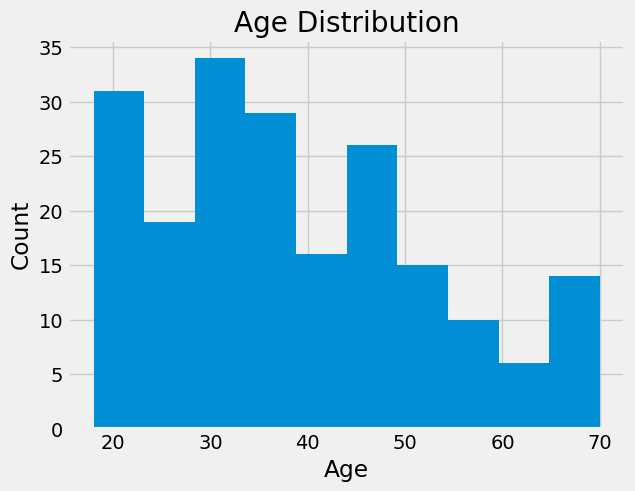

In [ ]:
import matplotlib.pyplot as plt

df['Age'].hist()
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select relevant features and scale them
X = df[['Age', 'Annual Income (k$)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform K-Means clustering
kmeans = KMeans(n_clusters=3)
df['Cluster'] = kmeans.fit_predict(X_scaled)


In [ ]:
cluster_means = df.groupby('Cluster')[['Age', 'Annual Income (k$)']].mean()
print(cluster_means)


               Age  Annual Income (k$)
Cluster                               
0        34.960526           85.934211
1        26.661290           38.790323
2        55.806452           51.225806


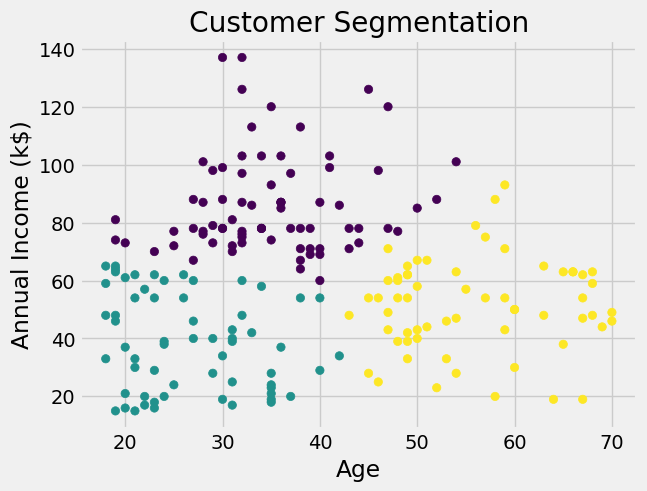

In [ ]:
plt.scatter(df['Age'], df['Annual Income (k$)'], c=df['Cluster'], cmap='viridis')
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
plt.title("Customer Segmentation")
plt.show()


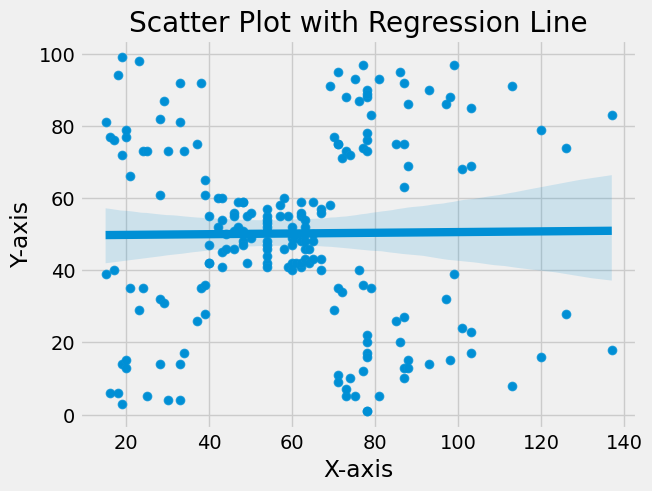

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Sample data
x = df['Annual Income (k$)'] # X-axis values
y = df['Spending Score (1-100)'] # Y-axis values
# Create scatter plot
sns.scatterplot(x=x, y=y)
# Fit and plot regression line
sns.regplot(x=x, y=y)
# Customize the chart
plt.title("Scatter Plot with Regression Line")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
# Display the chart
plt.show()


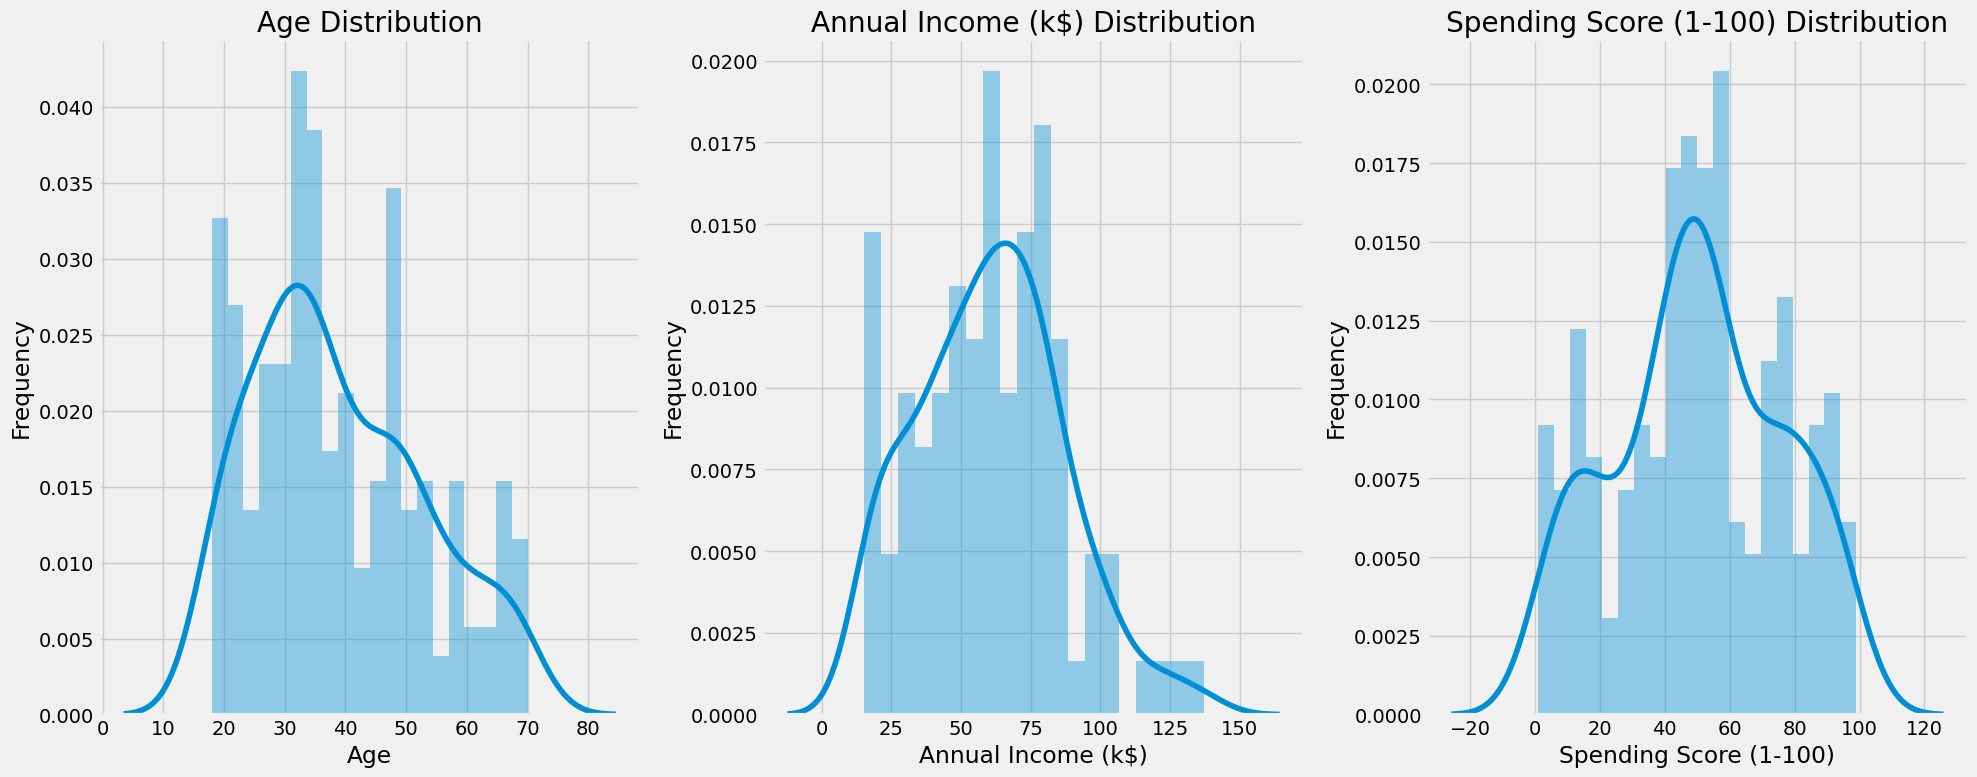

In [ ]:
plt.figure(figsize=(20, 8))
for i, col in enumerate(['Age', 'Annual Income (k$)', 'Spending Score (1-100)']):
 ax = plt.subplot(1, 3, i+1)
 sns.distplot(df[col], bins=20, kde=True)
 ax.set_xlabel(col)
 ax.set_ylabel('Frequency')
 ax.set_title(f'{col} Distribution')
plt.tight_layout()
plt.show()



<Axes: >

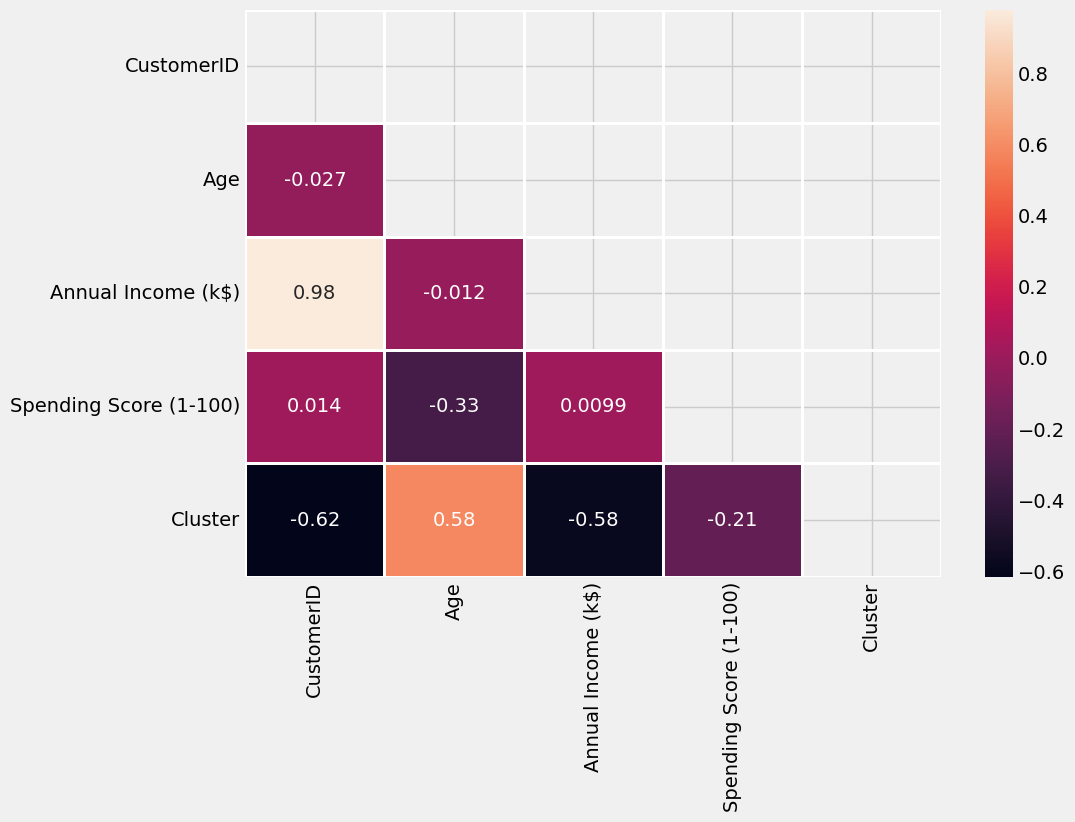

In [ ]:
plt.figure(figsize=(10, 7))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot=True,linewidth=.8, mask=matrix, cmap="rocket")


In [ ]:
def skewnessCorrector(columnName):
 print('''Before Correcting''')
 (mu, sigma) = norm.fit(df[columnName])
 print("Mu before correcting {} : {}, Sigma before correcting {} : {}".format(
 columnName.capitalize(), mu, columnName.capitalize(), sigma))
 plt.figure(figsize=(20, 10))
 plt.subplot(1, 2, 1)
 sns.distplot(df[columnName], fit=norm, color="lightcoral");
 plt.title(columnName.capitalize() +
 " Distplot before Skewness Correction", color="black")
 plt.subplot(1, 2, 2)
 stats.probplot(df[columnName], plot=plt)
 plt.show()
 df[columnName], lam_fixed_acidity = boxcox(
 df[columnName])
 print('''After Correcting''')
 print("Mu after correcting {} : {}, Sigma after correcting {} : {}".format(
 columnName.capitalize(), mu, columnName.capitalize(), sigma))
 plt.figure(figsize=(20, 10))
 plt.subplot(1, 2, 1)
 sns.distplot(df[columnName], fit=norm, color="orange");
 plt.title(columnName.capitalize() +
" Distplot After Skewness Correction", color="black")
 plt.subplot(1, 2, 2)
 stats.probplot(df[columnName], plot=plt)
 plt.show()


Before Correcting
Mu before correcting Age : 38.85, Sigma before correcting Age : 13.934041050606963


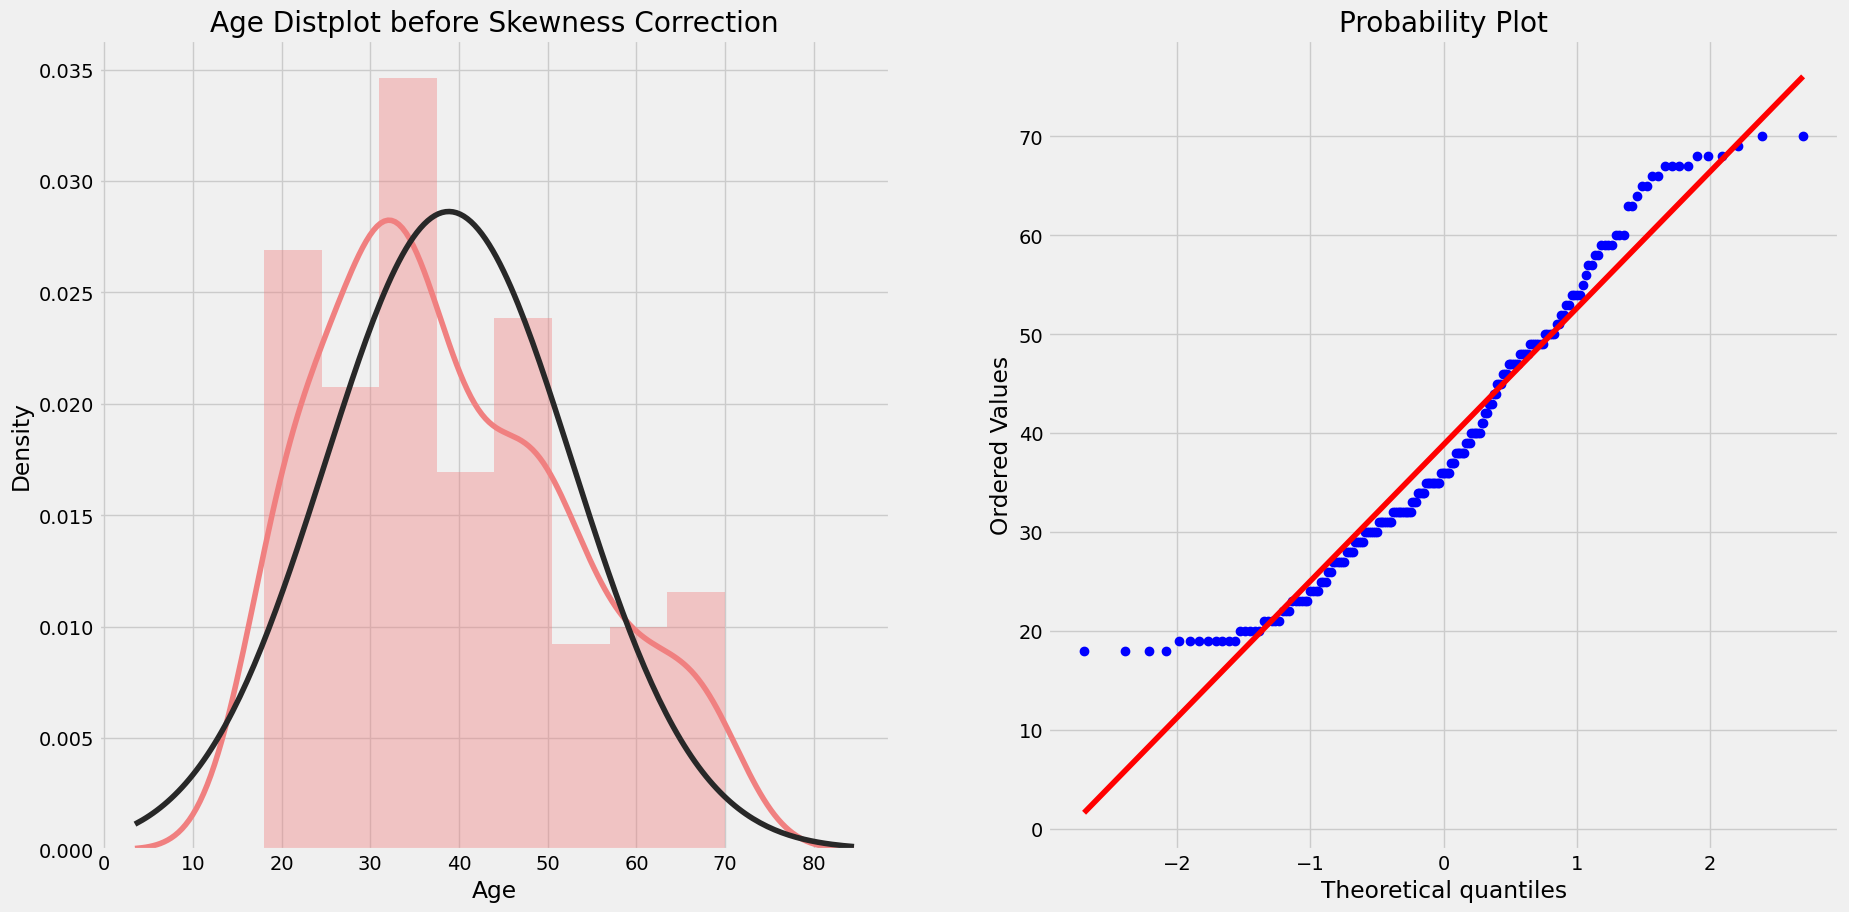

After Correcting
Mu after correcting Age : 38.85, Sigma after correcting Age : 13.934041050606963


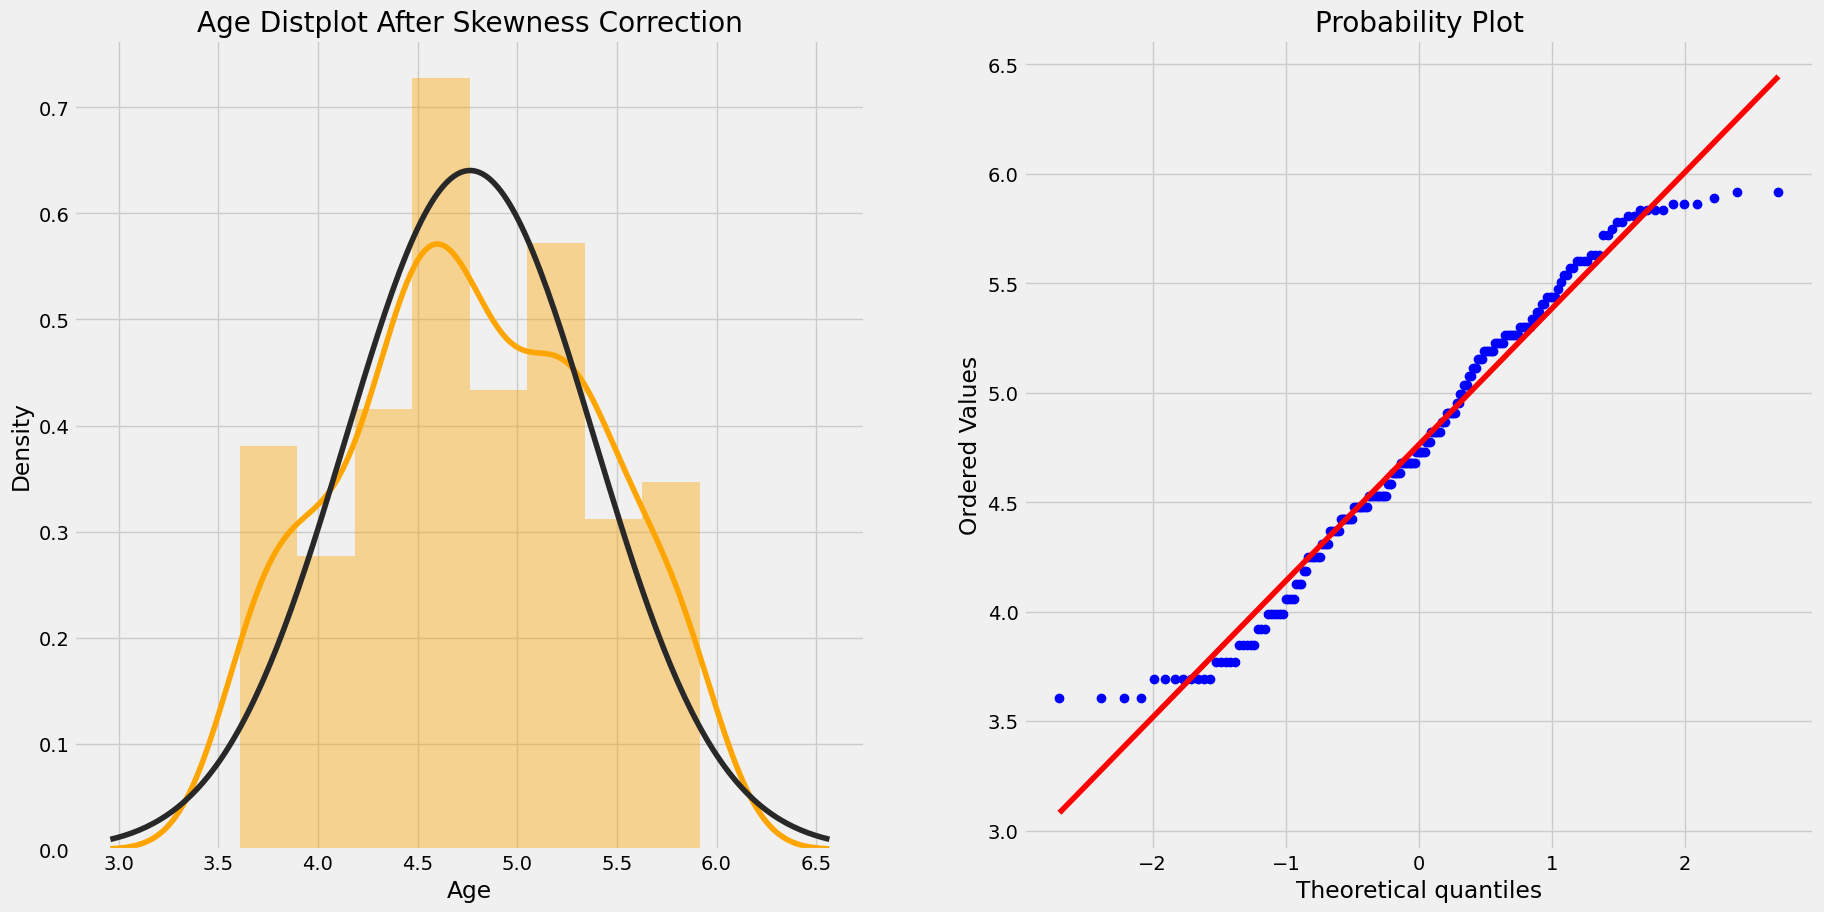

Before Correcting
Mu before correcting Annual income (k$) : 60.56, Sigma before correcting Annual income (k$) : 26.19897707926781


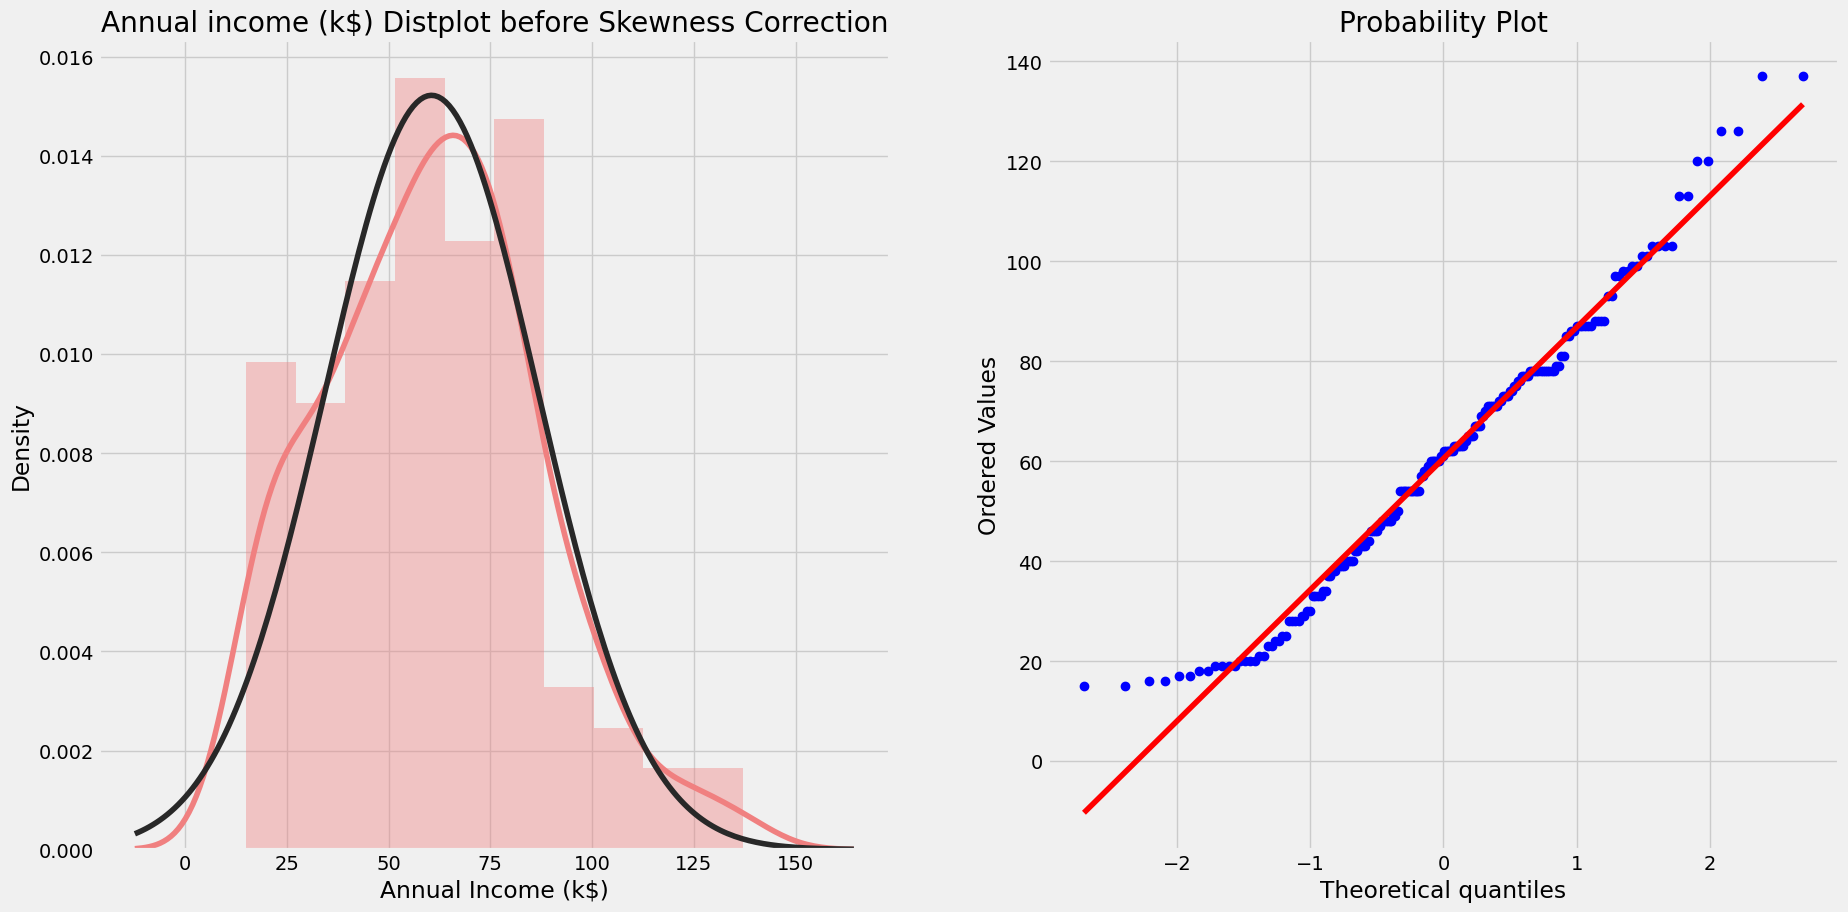

After Correcting
Mu after correcting Annual income (k$) : 60.56, Sigma after correcting Annual income (k$) : 26.19897707926781


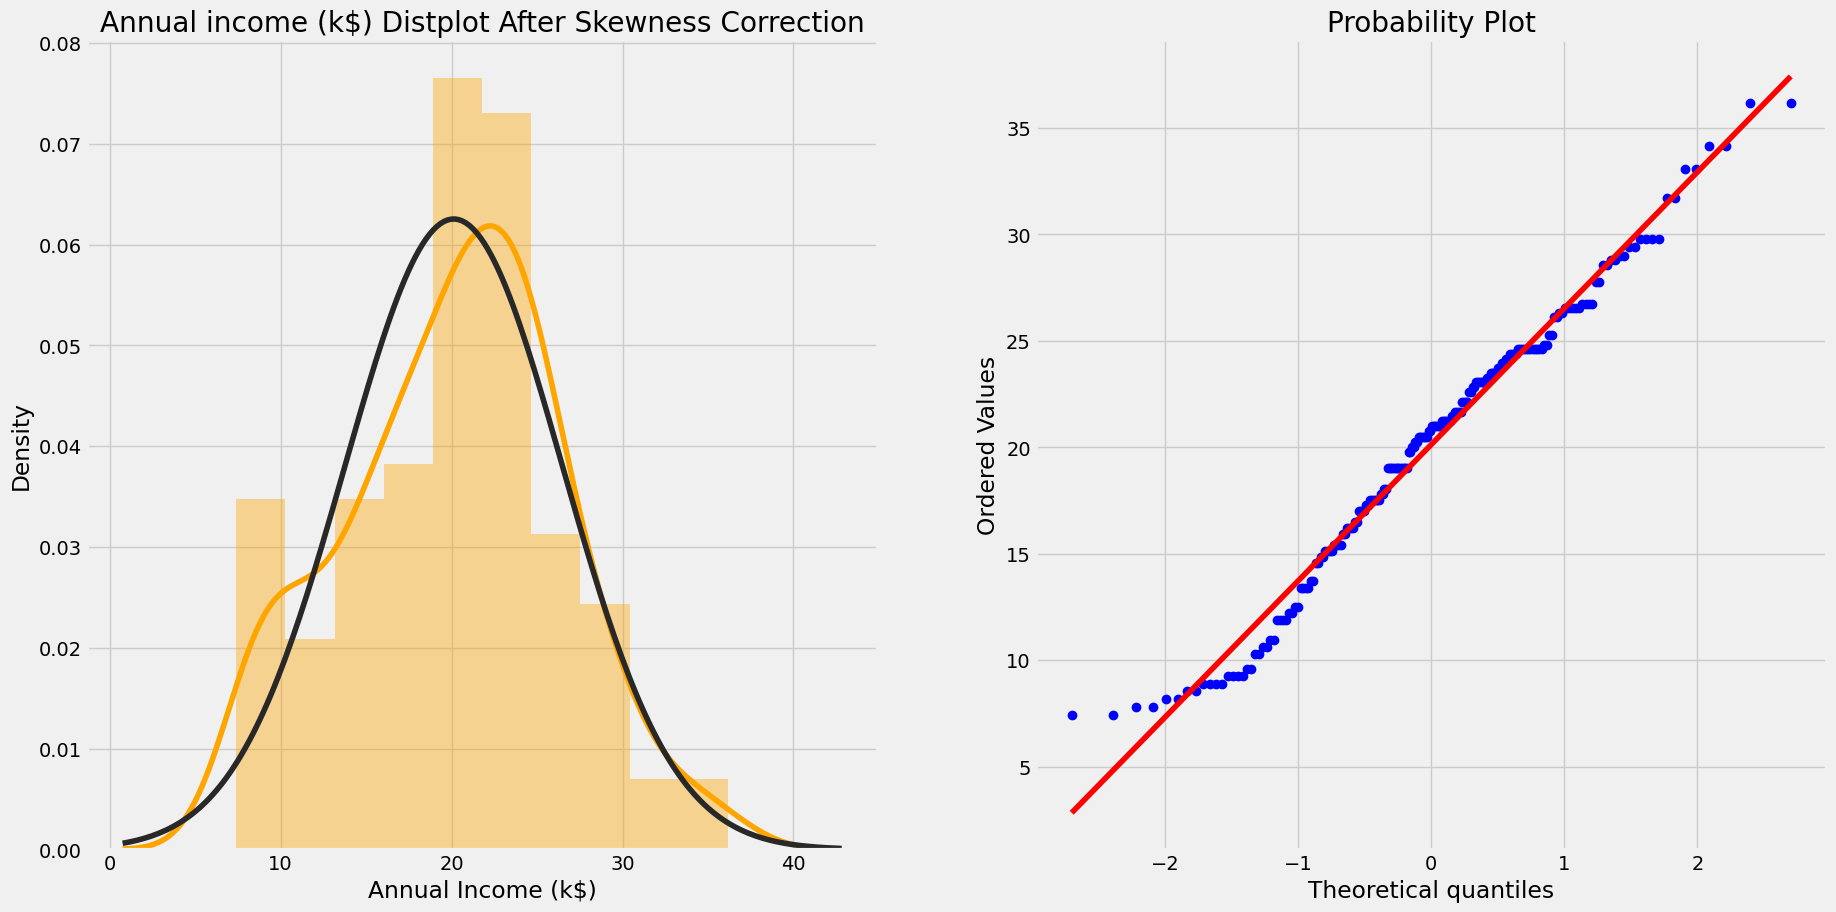

Before Correcting
Mu before correcting Spending score (1-100) : 50.2, Sigma before correcting Spending score (1-100) : 25.7588819633151


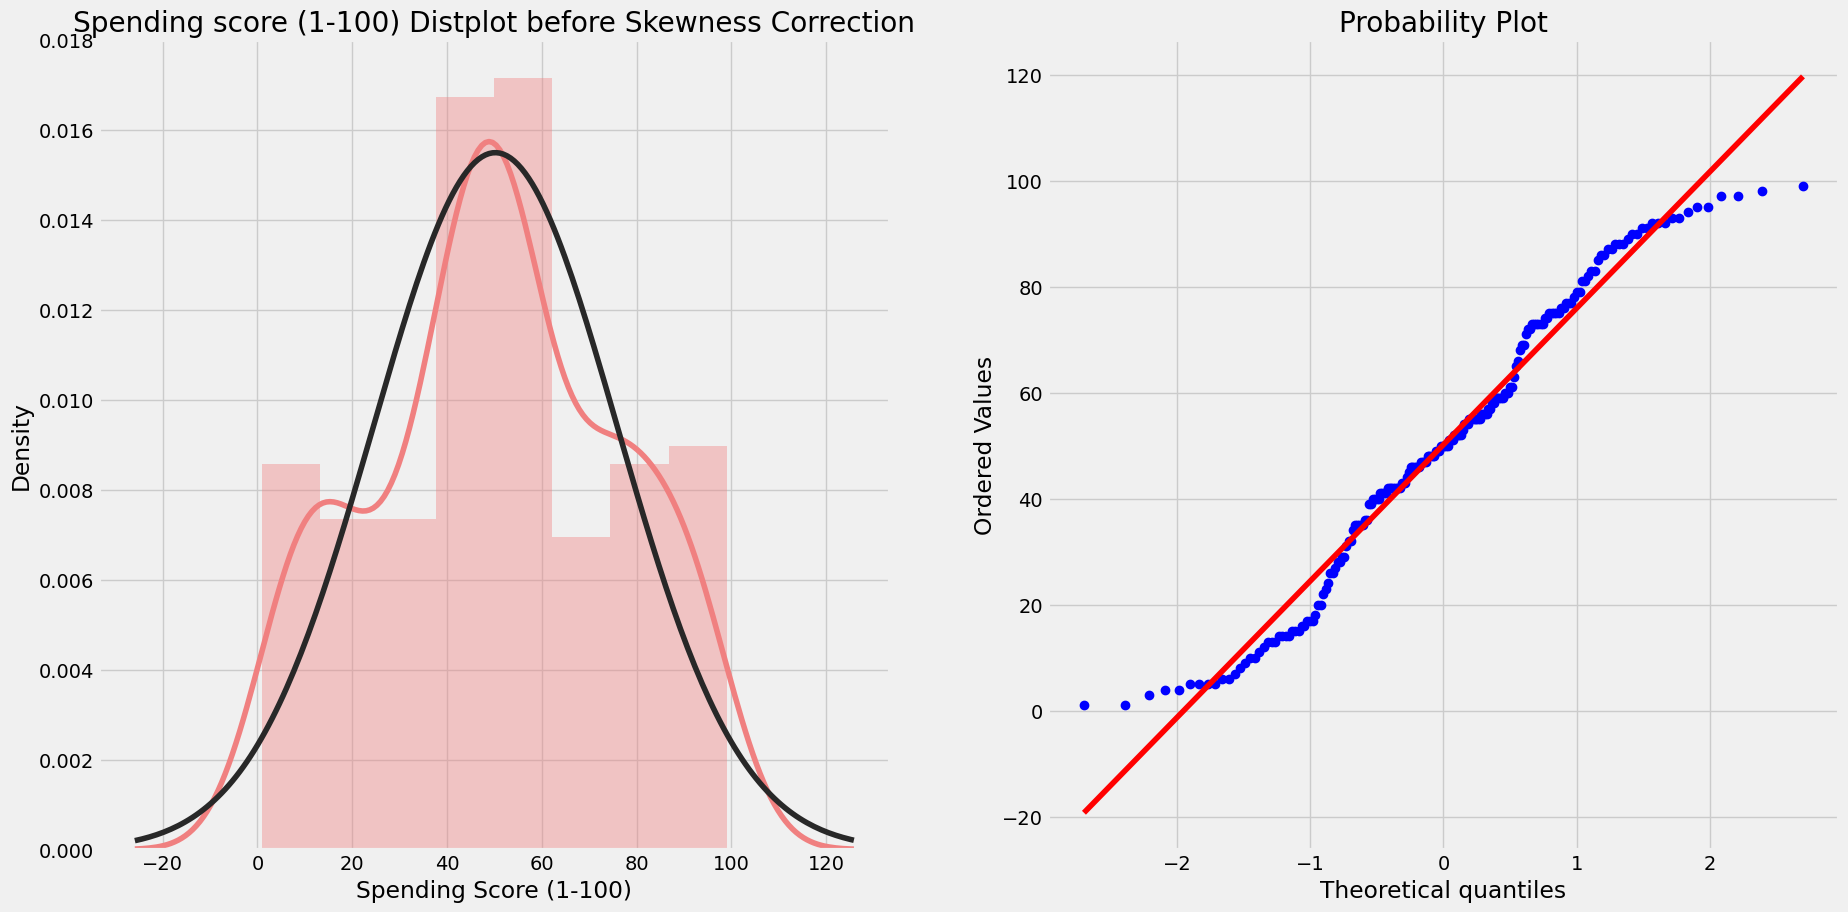

After Correcting
Mu after correcting Spending score (1-100) : 50.2, Sigma after correcting Spending score (1-100) : 25.7588819633151


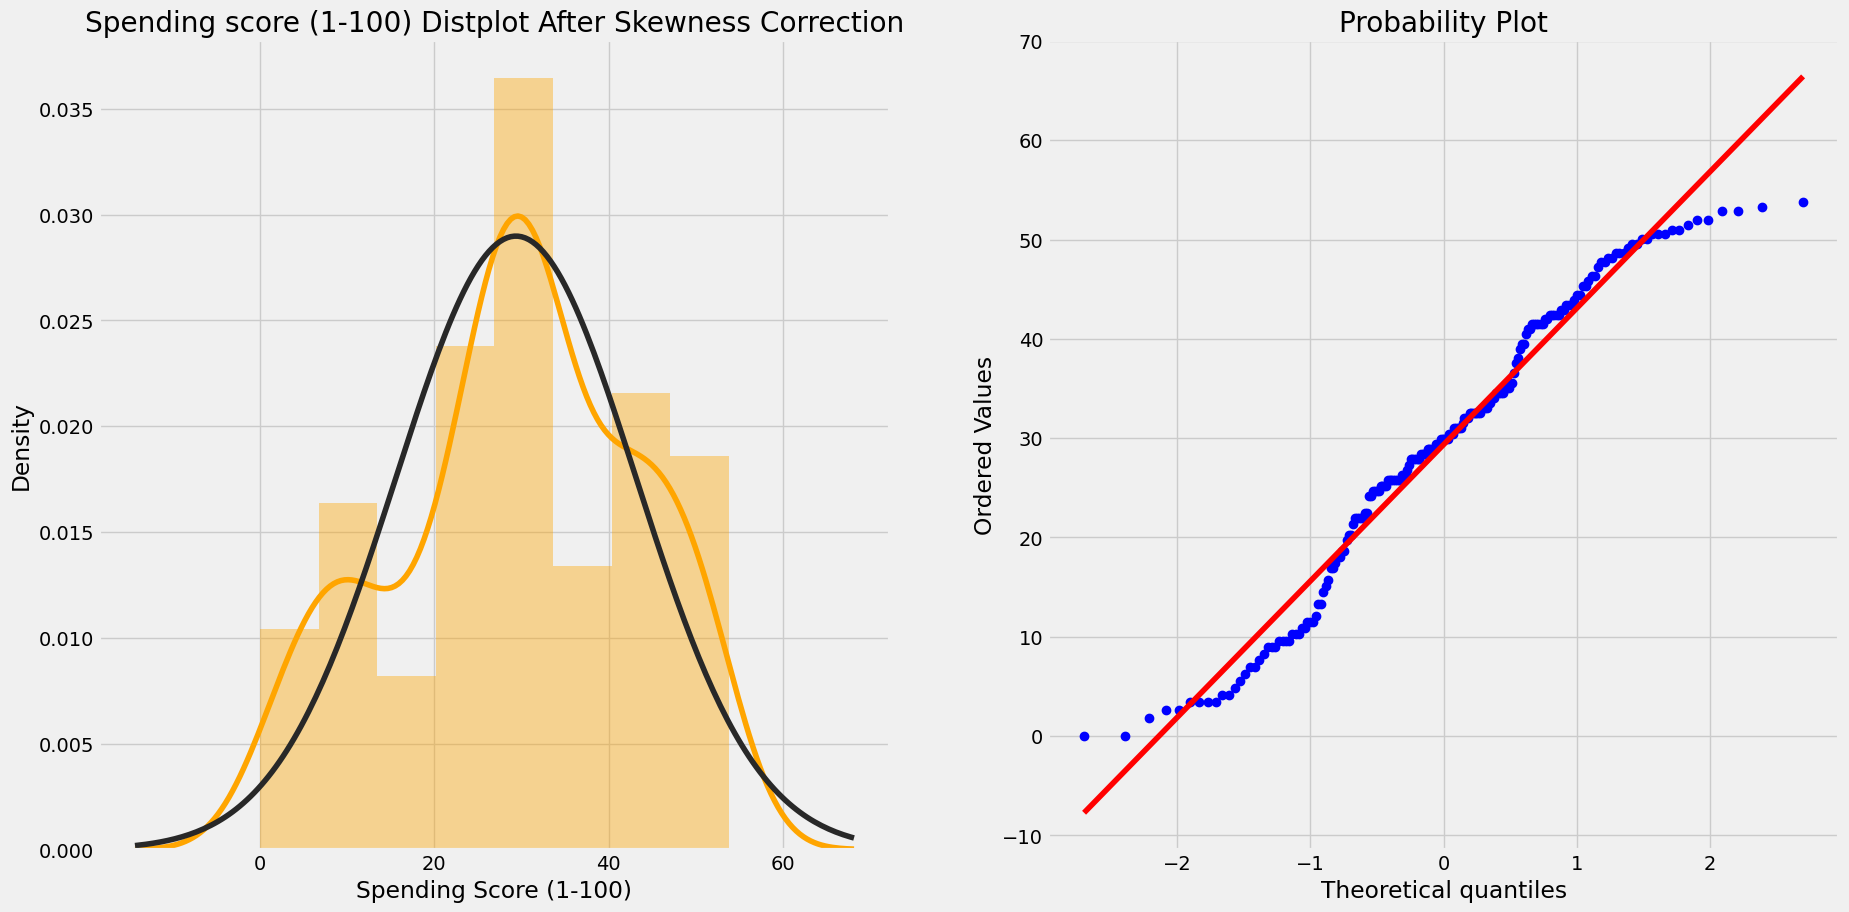

In [ ]:
skewColumnList = ['Age',
 'Annual Income (k$)', 'Spending Score (1-100)']
for columns in skewColumnList:
 skewnessCorrector(columns)

In [ ]:
df.corr

<bound method DataFrame.corr of      CustomerID  Gender       Age  Annual Income (k$)  Spending Score (1-100)  \
0             1    Male  3.691442            7.409624               24.128630   
1             2    Male  3.847430            7.409624               45.328722   
2             3  Female  3.771098            7.793130                4.135102   
3             4  Female  3.991239            7.793130               43.408853   
4             5  Female  4.476951            8.168337               24.667863   
..          ...     ...       ...                 ...                     ...   
195         196  Female  4.680657           33.053921               44.370829   
196         197  Female  5.114323           34.169044               18.025192   
197         198    Male  4.529888           34.169044               41.957959   
198         199    Male  4.529888           36.166397               12.110742   
199         200    Male  4.422538           36.166397               46.282649

In [ ]:
df_encoded = pd.get_dummies(df, columns=['Gender'], drop_first=True)


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])


In [ ]:
from sklearn.cluster import KMeans
import numpy as np

# Assuming you have your dataset stored in a NumPy array called 'data'
# Instantiate the KMeans object with the desired number of clusters
k = 5
kmeans = KMeans(n_clusters=k)

# Fit the KMeans model to your data
kmeans.fit(df)  # Use 'data' instead of 'df' for your NumPy array

# Get the cluster labels for each data point
labels = kmeans.labels_

# Get the coordinates of the cluster centers
centers = kmeans.cluster_centers_

# Print the labels and centers
print("Cluster Labels:")
print(labels)
print("\nCluster Centers:")
print(centers)


Cluster Labels:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 2 0 2 0 4 0 4 0 4 0 4
 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0
 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4]

Cluster Centers:
[[1.67000000e+02 5.15151515e-01 4.87250166e+00 2.69379655e+01
  1.16827371e+01 2.42424242e-01]
 [2.30000000e+01 4.00000000e-01 4.60336500e+00 1.11410612e+01
  2.85693714e+01 1.28888889e+00]
 [1.14630435e+02 4.78260870e-01 4.75870510e+00 2.17939142e+01
  3.06076882e+01 1.00000000e+00]
 [6.85000000e+01 3.91304348e-01 5.00280195e+00 1.76975533e+01
  3.05668591e+01 1.60869565e+00]
 [1.71000000e+02 4.33333333e-01 4.52414939e+00 2.72743195e+01
  4.61765030e+01 2.22044605e-16]]
